# DCGAN - Deep Convoluational GANs

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
print(f"Tensorflow Version: {tf.__version__}")

Tensorflow Version: 2.10.1


## Data Input

In [81]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [82]:
# Shape of input
samples, height, width = X_train.shape
print(f"Train Dataset :-\n\tSamples: {samples}\n\tDimension: {height}x{width} px")

Train Dataset :-
	Samples: 60000
	Dimension: 28x28 px


In [83]:
# No of images (classes)
y_train.shape

(60000,)

At position 40918th we have Number : 1


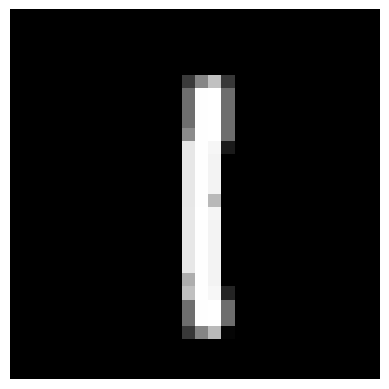

In [84]:
# Selecting random image out of 60000 image
i  = np.random.randint(0, 60000)
print(f"At position {i}th we have Number : {y_train[i]}")
plt.imshow(X_train[i],cmap='gray')
plt.axis(False)
plt.show()

In [85]:
# Reshaping input X train
channel = 1 # Grayscale
X_train = X_train.reshape(samples, height, width, channel).astype('float32')
X_train.shape

(60000, 28, 28, 1)

In [86]:
# Getting range of values of pixels for first image
img_number = 0 # First image

X_train[img_number].min(), X_train[img_number].max()

(0.0, 255.0)

### Standardization

In [87]:
# Standardization
X_train_standardized = (X_train - np.mean(X_train)) / (np.max(X_train) - np.min(X_train))

# Getting values in range of -1 to 1
X_train = (X_train - 127.5)/127.5
X_train[0].min(), X_train[0].max()

(-1.0, 1.0)

### Mini-Batch Gradient Descent (MGD)

__Gradient descent__ is an optimization algorithm often used for finding the weights or coefficients of machine learning algorithms, such as artificial neural networks and logistic regression.



*3 types of Gradient Descent*
1. **Full-Batch Gradient Descent**: Updates model parameters after computing gradients on the entire training dataset in each iteration, providing an accurate but slow optimization method.

2. **Stochastic Gradient Descent (SGD)**: Updates parameters after computing gradients on a single randomly selected training example, making it fast but noisy.

3. **Mini-Batch Gradient Descent**: Updates parameters after computing gradients on small, randomly selected subsets (mini-batches) of the training dataset, combining efficiency and stability in optimization.

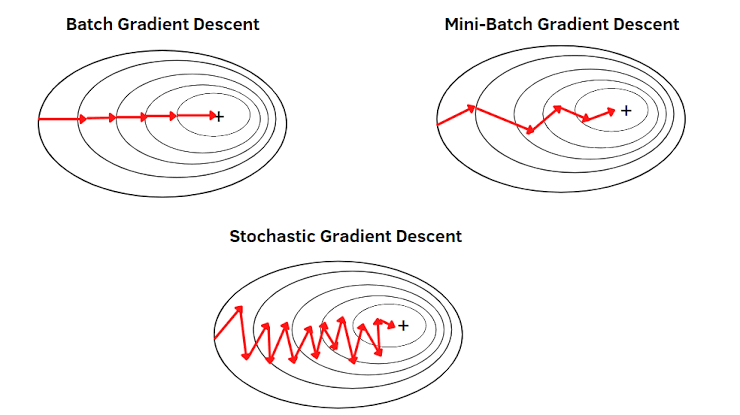

** Pseudocode of GD
```Python
model = initialization(...)
n_epochs = ...
train_data = ...
for i in n_epochs:
train_data = shuffle(train_data)
X, y = split(train_data)
predictions = predict(X, model)
error = calculate_error(y, predictions)
model = update_model(model, error)
```

It combines the advantages of both full-batch (better convergence) and SGD (faster updates) while avoiding their drawbacks.


In [88]:
# Buffer Size
BUFFER_SIZE = 60000
BATCH_SIZE = 256

BUFFER_SIZE / BATCH_SIZE # Mini Batch

234.375

### Tenors Inputs

* `from_tensor_slices`: Creates a dataset from a list or NumPy array suitable for static in-memory data
* `from_tensor` from a single tensor, suitable for single tensors
* `from_generator` from a Python generator, suitable for dynamic data sources

In [89]:
dataset = tf.data.Dataset.from_tensor_slices(X_train) # Create a dataset from your X_train data
dataset = dataset.shuffle(buffer_size=BUFFER_SIZE) # Shuffle dataset
X_train = dataset.batch(batch_size=BATCH_SIZE) # Batch the dataset into mini-batches for training

In [91]:
type(X_train)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [92]:
X_train

<BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

## Generator Block